**Praktikum 3 - Linier Brightness, Contrast, Inverse, Logarithmic Brightness, dan Grayscale Image**

Nama  : Alfan Olivan

NIM   : 2141720078

### **Praktikum**

In [21]:
# Connect to GDrive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 60


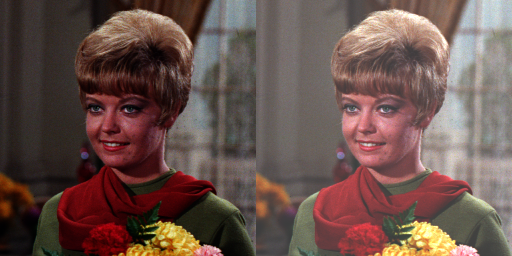

In [22]:
# Transformasi Linier Brightness
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
print("Mengubah tingkat kecerahan citra")
print("---------------------------------")

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print("error, not a number")

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### **Tugas Praktikum**

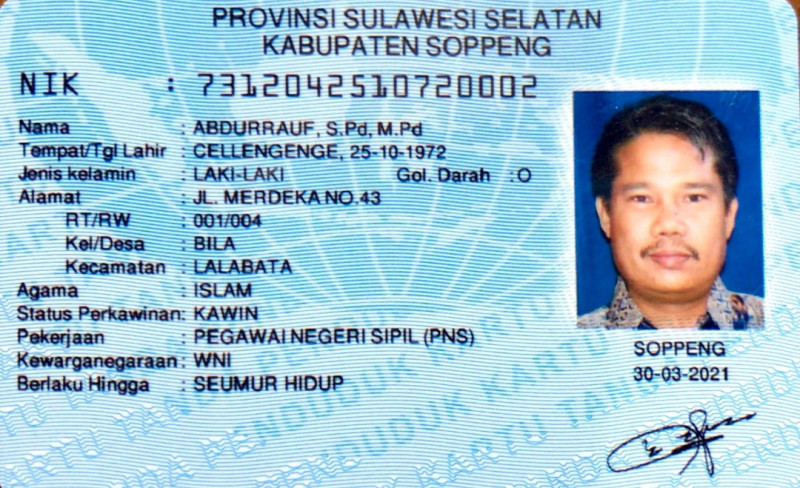

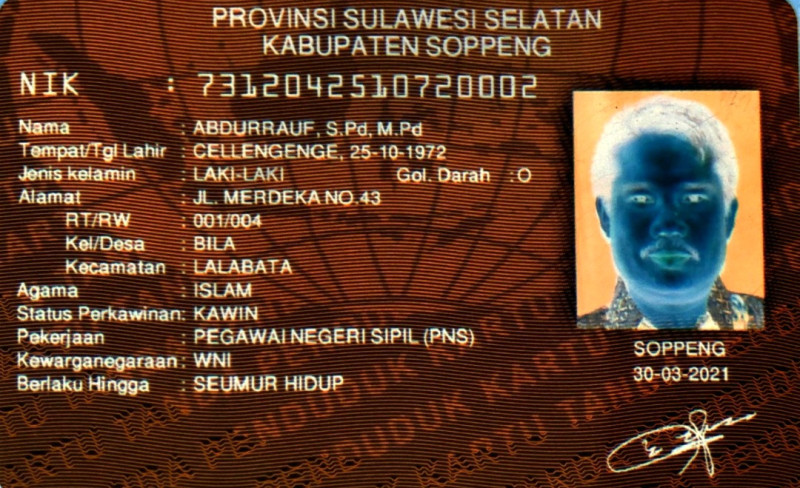

In [23]:
# 1. Implementasi inverse citra

original = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png')
inverted_image = 255 - original
cv2_imshow(original)
cv2_imshow(inverted_image)

Masukkan tingkat kecerahan[-255 - 255]: 50
Masukkan kontras[1.0 - 3.0]: 2


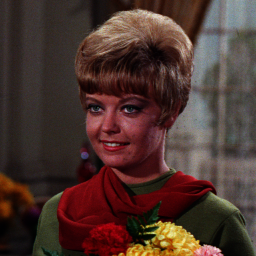

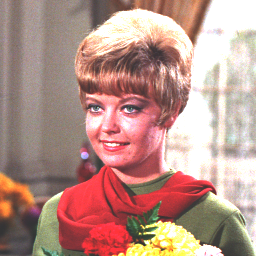

In [24]:
# 2. Implementasi tranformasi contrast
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

image = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
image_np = np.array(image)

try:
  brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras[1.0 - 3.0]: '))
except ValueError:
  print("error, not a number")

enhanced_image_np = np.clip(contrast * image_np + brightness, 0, 255).astype(np.uint8)
enhanced_image = Image.fromarray(enhanced_image_np)
cv2_imshow(image_np)
cv2_imshow(enhanced_image_np)

Masukkan tingkat kecerahan: 50


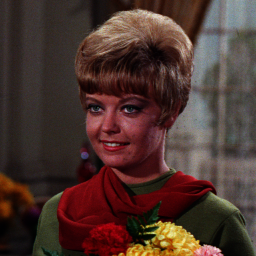

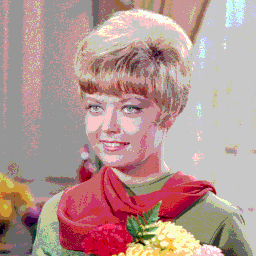

In [28]:
# 3. Implementasi Logaritmic brightness
import math

image = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
image_np = np.array(image)
try:
  brightness = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
  print("error, not a number")

brightened_image_np = brightness * np.log1p(image_np).astype(np.uint8)
cv2_imshow(image_np)
cv2_imshow(brightened_image_np)

<ipython-input-29-3eca1ce12fdd>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  grayscale_value = (r + g + b) / 3


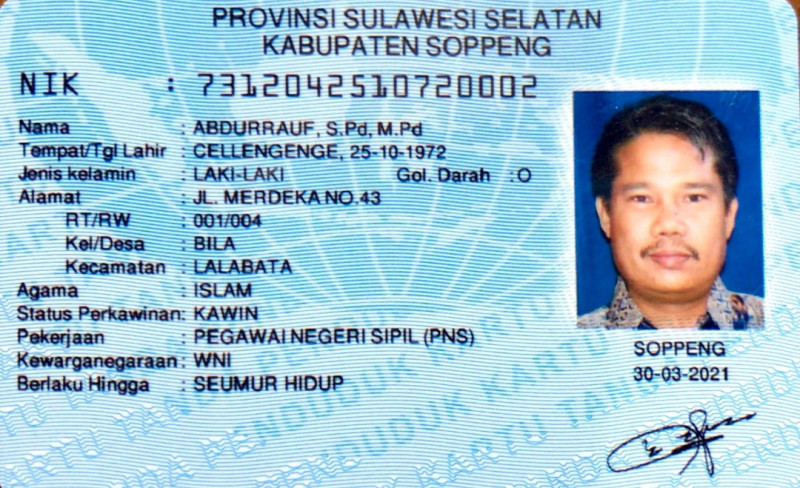

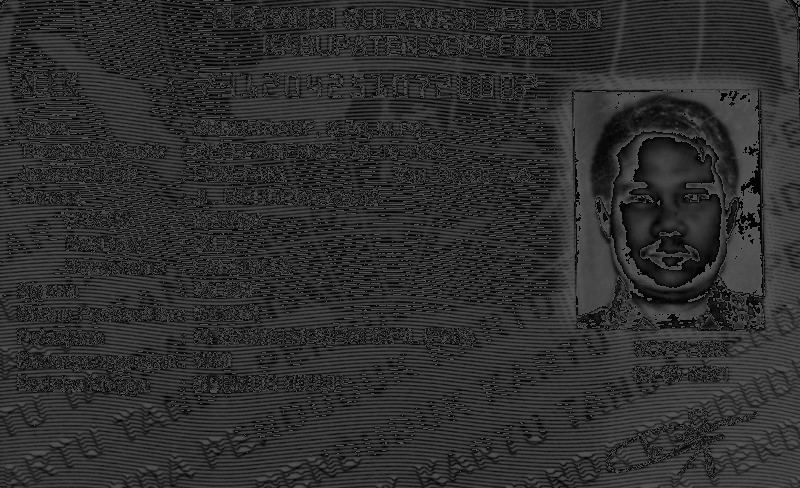

In [29]:
# 4a. Grayscale - Averaging
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

image = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png')
image_np = np.array(image)

height, width, _ = image_np.shape
grayscale_image_np = np.empty((height, width), dtype=np.uint16)

for i in range(height):
    for j in range(width):
        r, g, b = image_np[i, j]
        grayscale_value = (r + g + b) / 3
        grayscale_image_np[i, j] = grayscale_value

cv2_imshow(image)
cv2_imshow(grayscale_image_np)


<ipython-input-30-b09789c027b4>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  lightness_value = np.uint8((max(r, g, b) + min(r, g, b)) / 2)


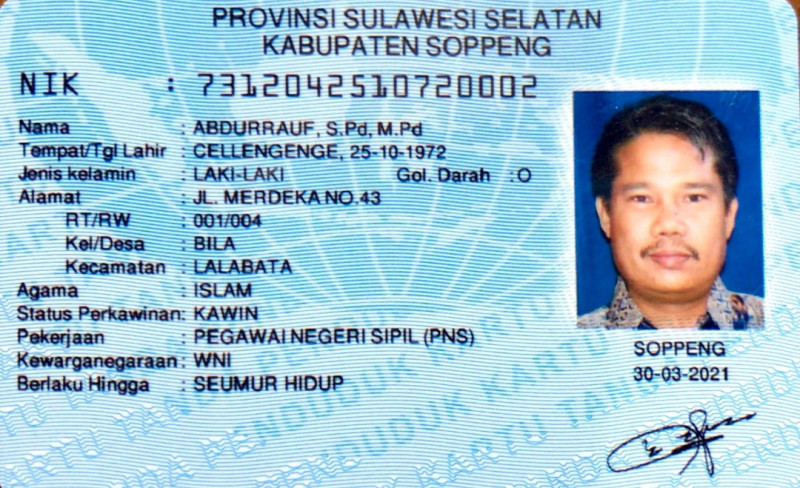

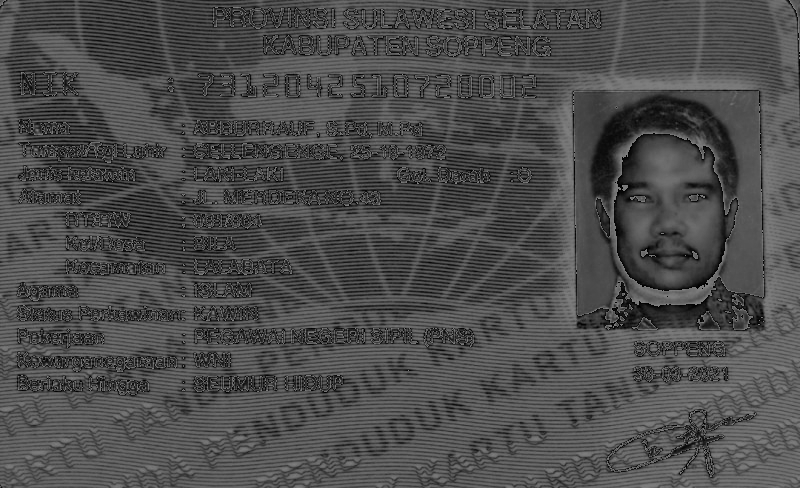

In [30]:
# 4b. Grayscale - Lightness
image = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png')
image_np = np.array(image)

height, width, _ = image_np.shape
grayscale_image_np = np.empty((height, width), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        r, g, b = image_np[i, j]
        lightness_value = np.uint8((max(r, g, b) + min(r, g, b)) / 2)
        grayscale_image_np[i, j] = lightness_value

cv2_imshow(image)
cv2_imshow(grayscale_image_np)

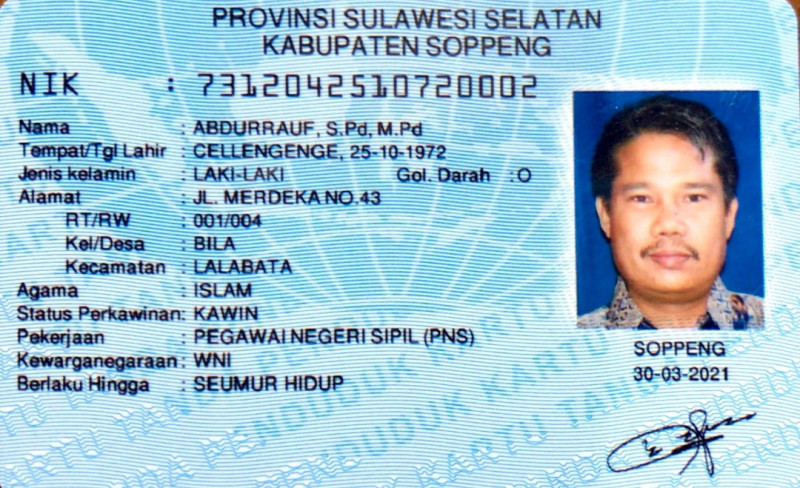

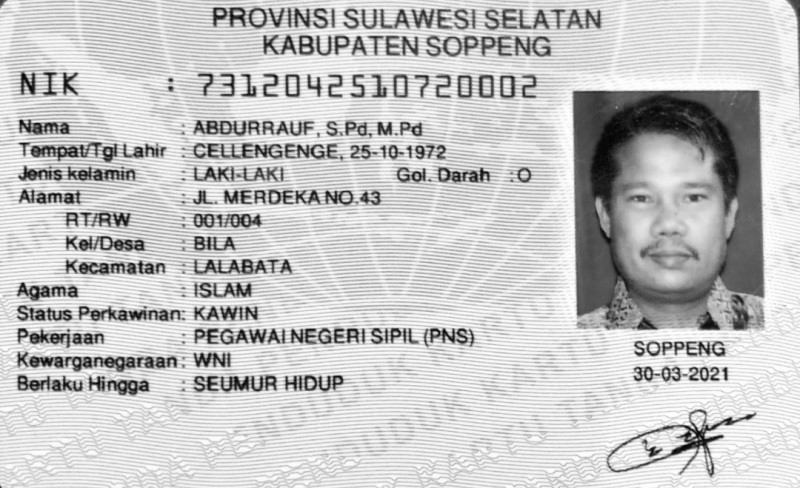

In [31]:
# 4b. Grayscale - Luminance
image = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png')
image_np = np.array(image)

height, width, _ = image_np.shape
grayscale_image_np = np.empty((height, width), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        r, g, b = image_np[i, j]
        luminance_value = np.uint8(0.299 * r + 0.587 * g + 0.114 * b)
        grayscale_image_np[i, j] = luminance_value

cv2_imshow(image_np)
cv2_imshow(grayscale_image_np)

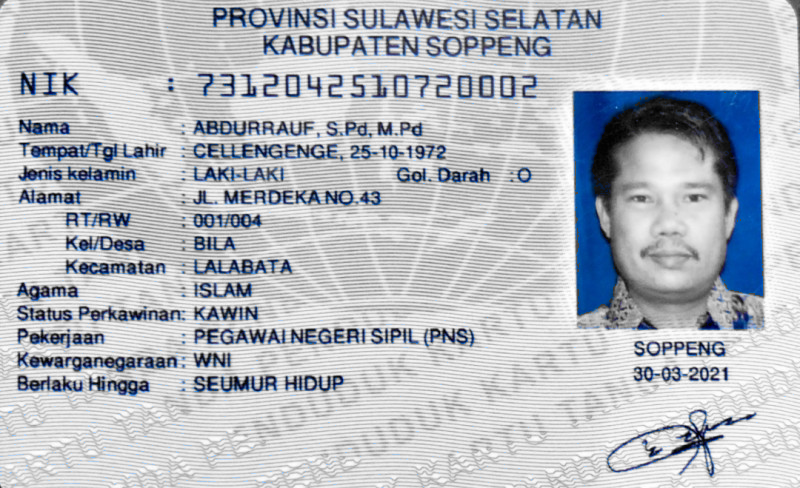

In [32]:
#import the libraries
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

#read the image
img = cv.imread('/content/drive/MyDrive/PCVK/ktp-test.png')
#convert the BGR image to HSV colour space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#set the bounds for the blue hue
lower_blue = np.array([105, 50, 50])
upper_blue = np.array([135, 255, 255])

#create a mask using the bounds set
mask = cv.inRange(hsv, lower_blue, upper_blue)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the blue colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than blue from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)

#display the images
cv2_imshow(added_img)
